# Pyramids and Wavelets

The <a href="https://en.wikipedia.org/wiki/Pyramid_(image_processing)">Laplacian pyramid</a> and the [Discrete Wavelet Transform](https://en.wikipedia.org/wiki/Discrete_wavelet_transform) are two closed numerical transforms that can be used to obtain a multiresolution representation of a image. http://www.uni-mannheim.de/acm97/papers/liang/acm97.html http://research.microsoft.com/en-us/um/people/jinl/paper_2002/msri_jpeg.htm

## Gaussian Scale Space (Gaussian pyramid)

The $N$-levels Gaussian pyramid $L_n;~n\in\{0,1,\cdots,N-1\}$ of a image $I$ is defined as

\begin{equation}
  \left\{\begin{array}{rcl}
    L_0 & = & I \\
    L_{n+1} & = & \text{REDUCE}(L_n);~n\in\{0,1,\cdots,N-1\}
  \end{array}\right.
\end{equation}

where the $\text{REDUCE}(s)$ operator is carried out by [convolving](http://my.ece.msstate.edu/faculty/fowler/Classes/ECE3443/Handouts/dt_convolution.pdf) $I$ with a Gaussian kernel $w$ (the unit impulse response, also known as the transfer function, of the corresponding Gaussian low-pass filter). A Gaussian kernel is the evaluation of a Gaussian function at (for example, 5, in the case 1-dimensional) values centered at zero and, the Gaussian coefficients must satisfy that

\begin{equation}
  \sum_{m=-2}^2w(m)=1
\end{equation}

(the gain of the filter is $1$)

\begin{equation}
  w(i)=w(-i); i=0,1,2
\end{equation}

(the kernel is symmetric), and being $w[0]=a$, $w[-1]=w[1]=b$ and $w[-2]=w[2]=c$, it holds that

\begin{equation}
  a=2b-2c.
\end{equation}

Notice that in this case, $w=\{\frac{1}{16}, \frac{4}{16}, \frac{6}{16}, \frac{4}{16}, \frac{1}{16}\}$. This is the 1D kernel. The 2D version can be extended or the 1D can be applied by rows and then by columns, or viceversa.

As it will be seen in the demo (see below), the Gaussian scale space exhibits several interesting properties:

1. *Spatial homogeneity*: all locations in the image are filtered with the same gain.
2. *Spatial isotropy*: all the structures are treated with homogeneity independently of their orientation.
3. *Spatial scale invariace*: the gain of the filtering is independent of the size of the objects of the image.
4. *Linearity*: the filtering is carried out with a convolution, which is a linear operator.

The last stage of the $\text{REDUCE}(\cdot)$ operator is the decimation (the even or the odd samples are removed) of the filtered image. This is a lossless stage (without aliasing) only in the case the half of the high-frequency components of $L_n$ are not available in $L_{n+1}$. Notice that, as a consequence of the decimation, the overall energy of $L_{n+1}$ will be, on average, 1/4 of $G_n$.

### Gaussian pyramid of *lena*

\# Import the [urllib.request — extensible library for opening URLs](https://docs.python.org/3.0/library/urllib.request.html) module, the [urllib](https://docs.python.org/3/library/urllib.html) package is included in the standard library.

In [1]:
import urllib.request

\# Import [Python bindings](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_setup/py_intro/py_intro.html) for [OpenCV](http://docs.opencv.org/3.0-beta/index.html), a computer vision library. Install the package with "`sudo pip3 install opencv-python`". Recomended reading [OpenCV-Python Tutorials](http://docs.opencv.org/trunk/d6/d00/tutorial_py_root.html).

In [2]:
import cv2

\# Import [NumPy](http://www.numpy.org), an efficient array manipulation library. Install with "`pip3 install numpy`".

In [3]:
import numpy as np

\# Import the [pyplot API](http://matplotlib.org/api/pyplot_api.html) module from [matplotlib](http://matplotlib.org/index.html) package, a library for 2D plotting. This will allow us to plot data, interactively. Install with "`sudo pip3 install matplotlib`".

In [4]:
from matplotlib import pyplot as plt

\# [Configure matplotlib](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) for plotting inside Jupyter Notebook (not in external windows).

In [5]:
%matplotlib inline

\# Request the [lena image](https://en.wikipedia.org/wiki/Lenna). This function returns a file-like object.

In [6]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')

\# [Read](https://docs.python.org/3/tutorial/inputoutput.html) the complete "file" `HTTP_response` as a <a href="https://docs.python.org/3/library/functions.html#bytes">bytes object</a>. This (<a href="https://en.wikibooks.org/wiki/Python_Programming/Data_Types#Mutable_vs_Immutable_Objects">inmutable</a>) object  is transformed in a (<a href="https://en.wikibooks.org/wiki/Python_Programming/Data_Types#Mutable_vs_Immutable_Objects">mutable</a>) <a href="https://docs.python.org/3/library/functions.html#bytearray">bytearray object</a>, as the NumPy's [asarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html) (function) converter, requires. The final result is an [array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) object containing unsigned integers of 8 bits.

In [7]:
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)

\# [Decompress](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html) the content of the input array. Returns an [image object](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html).

In [8]:
BGR = cv2.imdecode(arr,-1)

\# Convert the image to the YCrCb [color space](http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor).

In [9]:
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
#tmp = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
#I = tmp

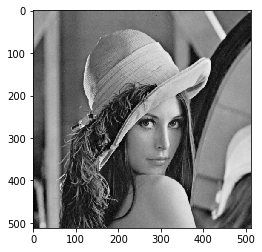

In [10]:
plt.imshow(Y, cmap="gray")

\# Compute the pyramid. We use a <a href="https://docs.python.org/3/library/stdtypes.html#sequence-types-list-tuple-range">list</a> for storing the floors of it.

In [14]:
N = 5 # Number of levels of the pyhramid
L = [Y] # G_0 (the base of the pyramid)

\# OpenCV's <a href="http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gaf9bba239dfca11654cb7f50f889fc2ff">pyrDown</a> low-pass filter and decimate an image. Extra info [here](http://docs.opencv.org/master/dc/dff/tutorial_py_pyramids.html).

In [12]:
for n in range(N-1):
    print(n, len(L), len(L[n]))
    L.append(cv2.pyrDown(L[n]))

0 1 512
1 2 256
2 3 128
3 4 64


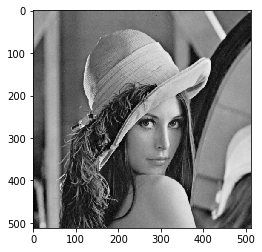

In [13]:
plt.imshow(L[0], cmap="gray")

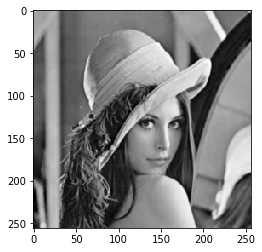

In [14]:
plt.imshow(L[1], cmap="gray")

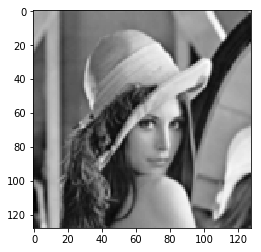

In [15]:
plt.imshow(L[2], cmap="gray")

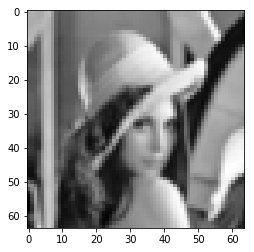

In [16]:
plt.imshow(L[3], cmap="gray")

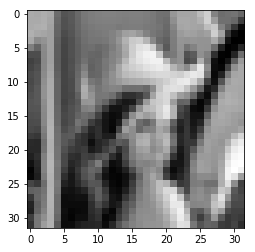

In [17]:
plt.imshow(L[4], cmap="gray")

## Laplacian pyramid (Laplacian Pyramid Transform) (LPT)

### Forward transform

In the Gaussian pyramid, the image $L_{N-1}$ (the "roof") may serve as a prediction for the image (next floor) $L_{N−2}$, and if this prediction is substracted to $L_{N-2}$, the resulting error signal $H_{N-2}$ can have a lower entropy than $L_{N-2}$. This process can be applied to the complete Gaussian pyramid, level by level, obtaining a Laplacian pyramid by means of:

\begin{equation}
  \left\{\begin{array}{rcl}
    H_{N-1} & = & L_{N-1} \\
    H_n     & = & L_n - \text{EXPAND}(L_{n+1});~n\in\{N-2,N-3,\cdots,0\}
\end{array}\right.
\end{equation}


### LPT of Lena

In [18]:
H = [L[N-1]]
for n in range(N-1):
    interpolation = cv2.pyrUp(L[N-n-1])
    difference = L[N-n-2] - interpolation + 128
    H.append(difference)
H.reverse()

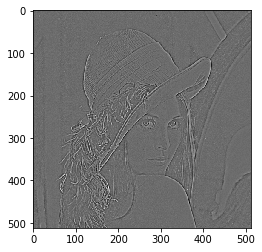

In [19]:
plt.imshow(H[0], cmap="gray")                            

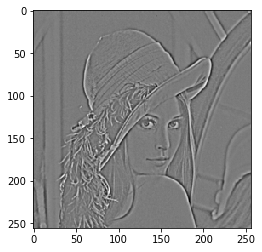

In [20]:
plt.imshow(H[1], cmap="gray")

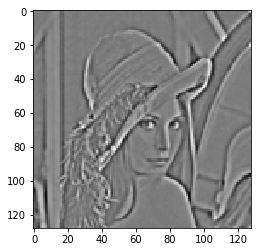

In [21]:
plt.imshow(H[2], cmap="gray")

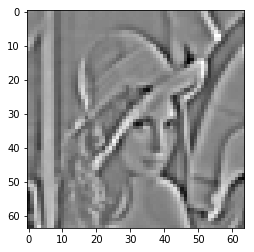

In [22]:
plt.imshow(H[3], cmap="gray")

\# Compute (and plot) the histograms of the pyramid using [`cv2.calcHist()`](http://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html).

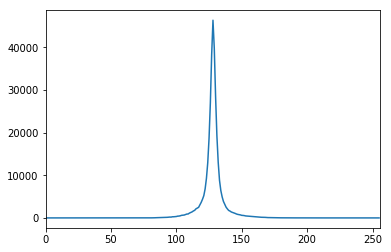

In [23]:
sum_hist = np.zeros([256,1], np.float64)
for n in range(N):
    hist = cv2.calcHist([H[n]], [0], None, [256], [0, 256])
    sum_hist += hist
plt.plot(sum_hist)
plt.xlim([0,256])
plt.show()

\# Count the number of elements in each component of the pyramid.

In [24]:
n_pels = 0
for n in range(N):
    n_pels += ((Y.shape[0]+1) >> n) * ((Y.shape[1]+1) >> n)

In [25]:
print("Number of elements in the original image =", Y.shape[0]*Y.shape[1])

Number of elements in the original image = 262144


In [26]:
print("Number or elements in (a component of) the pyramid =", n_pels, "(",100.*(n_pels/(1.*Y.shape[0]*Y.shape[1])-1),"% of increment)")

Number or elements in (a component of) the pyramid = 350209 ( 33.59413146972656 % of increment)


\# Install [`scipy`](https://www.scipy.org) with `pip3 install scipy` to use "[`scipy.stats.entropy`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.entropy.html)".

In [27]:
import scipy.stats as st

In [28]:
entropy = st.entropy(sum_hist)[0]
print("Entropy of the pyramid =", entropy)

Entropy of the pyramid = 3.19883347076


In [31]:
#import math
#codestream_size = 0.
#colors = ('r','g','b')
#for i,col in enumerate(colors):
#    codestream_size += float(n_pels*entropy[i])
#print("Expected length of the compressed image (all components) =", math.ceil(codestream_size/8.), "bytes")

IndexError: invalid index to scalar variable.

### Inverse transform

The original image $I$ can be recovered from $\{H_n; n=N-1,\cdots,0\}$, the Laplacian pyramid, using the procedure:

\begin{equation}
  \left\{\begin{array}{rcl}
    I & = & H_{N-1} \\
    I & = & \text{EXPAND}(I) + H_n;~n\in\{N-2,N-3,\cdots,0\}
\end{array}\right.
\end{equation}

Notice that, basically, we have reconstructed (in-place) the whole Gaussian Pyramid.

### Inverse LPT of Lena

In [29]:
R = H[N-1]
for n in range(N-1):
    R = cv2.pyrUp(R)
    R = R + H[N-n-2] - 128

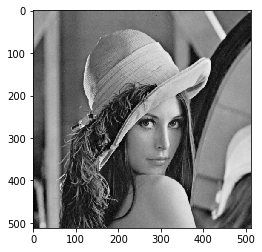

In [31]:
plt.imshow(R, cmap="gray")

In [33]:
# Check if the reconstruction is lossless
print((R == Y).all())

True


## Discrete Wavelet Transform (DWT)

### Forward transform

The [DWT](https://en.wikipedia.org/wiki/Discrete_wavelet_transform) can be computed using two different techniques. The first one is through a cascade of quadrature mirror filters banks, also known as PRFBs (Perfect Reconstruction Filter Banks). The second one, using Lifting. The main differences between both alternatives are: 

1. Filter banks use decimation and therefore, half of output coefficients are discarded after their computation. This is rather inefficient.
2. Lifting provides a more general framework in which non-lineal transforms, for example, can de defined. This can be useful to create transforms suitable for representing non-linear systems such as motion compensation in video compression.

However, in order to create a comparison between pyramids and wavelets, we will work, first, with the PRFB option.

The one-step inverse DWT of a signal $S$ can be defined by:

\begin{equation}
  S = \uparrow^2(L)*{\cal L}^{-1} + \uparrow^2(H)*{\cal H}^{-1}
\end{equation}

where $L$ and $H$ are the low-pass subband and the high-pass subband, respectively, generated by the forward DWT, and ${\cal L}^{-1}$ and ${\cal H}^{-1}$ are the synthesis filters of the "inverse transform". The subbands are computed by convolving the signal $S$ as

\begin{equation}
  \begin{array}{rcl}
      L & = & \downarrow^2(S*{\cal L})\\
      H & = & \downarrow^2(S*{\cal H}),
  \end{array}
\end{equation}

where ${\cal L}$ and ${\cal H}$ are (the response to the unit impulse signal of) the analysis filters of the "forward transform". If we express these filters in the $Z$-domain, in the case of a PRFB [it holds that](https://www.google.es/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwjTveDwhpfQAhUB1RoKHTSLAd8QFgglMAA&url=http%3A%2F%2Fwww.springer.com%2Fcda%2Fcontent%2Fdocument%2Fcda_downloaddocument%2F9781447149408-c2.pdf%3FSGWID%3D0-0-45-1376222-p174792774&usg=AFQjCNG-ItYeO23545Xq4BkLVkiF_rv79w&sig2=T3P171UkA28M-arguJGgdw)

\begin{equation}
  \begin{array}{rcl}
      {\cal L}^{-1}(z) & = & {\cal L}(-z)\\
      {\cal H}^{-1}(z) & = & -{\cal H}(-z).
  \end{array}
\end{equation}

In other words, in the case of the low-pass synthesis filter ${\cal L}^{-1}$, it is the same than ${\cal L}$, but the filter has been [modulated by the signal $(-1)^n; n\in\mathbb{N}$](http://fourier.eng.hmc.edu/e161/lectures/filterbank/node1.html), and in the case of the high-pass synthesis filter ${\cal H}^{-1}$, the coeffients of the filter also has the oposite sign. Because the frequency response of real-domain signals (and also the transfer function of the filters) are periodic in the Fourier domain, with period $\pi$ (the frequency of the signal $(-1)^n; n\in\mathbb{N}$), in the practice we can implement the PRFB considering that

\begin{equation}
  \begin{array}{rcl}
      {\cal L}^{-1}(z) & = & {\cal L}(z)\\
      {\cal H}^{-1}(z) & = & -{\cal H}(z).
  \end{array}
\end{equation}

This the definition of the 1-level DWT. The $N$-levels DWT is computed by applying the 1-level DWT to the $L$ subband, recursively:

\begin{equation}
  \left\{\begin{array}{rcl}
    L^N & = & \downarrow^2(L^{N-1}*{\cal L}) \\
    H^N & = & \downarrow^2(L^{N-1}*{\cal H})
  \end{array}\right.
\end{equation}

By definition, $L^0=S$.



# (LPT - DWT) relationship

## DWT $\rightarrow$ LPT

Considering the previous equation, it can be easely deduced that the LPT is described by 

\begin{equation}
  \left\{\begin{array}{rcl}
    L^N & = & \downarrow^2(L^{N-1}*{\cal L}) \\
    H^N & = & L^{N-1}*{\cal H}.
  \end{array}\right.
\end{equation}

Therefore, it is possible to compute the LPT by means of the DWT if the interpolate the coefficients its coefficients. In the case of a image, we have for the 1-level DWT the subbands:

```
+------+------+
|   L  |  LH  |
+------+------+
|  HL  |  HH  |
+------+------+
```

\# Install [PyWavelets](https://pywavelets.readthedocs.io/en/latest/) with "`sudo pip3 install pywavelets`".

In [11]:
import pywt

In [284]:
# Compute the DWT of each component
#print (pywt.wavelist(short=False))
print (pywt.wavelist())
#coeffs = pywt.dwt2(Y, 'bior3.5')
#coeffs = [None]*3
#for i,col in enumerate(colors):
#    print(i)
#    coeffs[i] = pywt.dwt2(I[:,:,i], 'bior3.5')
wavelet = 'db7'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

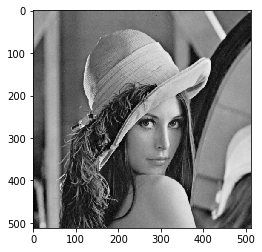

In [285]:
plt.imshow(Y, cmap='gray')

In [286]:
print(Y.shape)

(512, 512)


In [300]:
# N-levels 2D DWT (WAVElet DEComposition)
#full_coeffs = [] # One element for each component
coeffs = pywt.wavedec2(Y, wavelet, mode='per', level=N)
#for i,col in enumerate(colors):
#    full_coeffs.append(pywt.wavedec2(I[:,:,i], 'bior3.5', level=N))

In [301]:
for l in range(0,N+1):
    print(coeffs[l][0].shape, coeffs[l][1].shape, coeffs[l][2].shape)

(16,) (16,) (16,)
(16, 16) (16, 16) (16, 16)
(32, 32) (32, 32) (32, 32)
(64, 64) (64, 64) (64, 64)
(128, 128) (128, 128) (128, 128)
(256, 256) (256, 256) (256, 256)


In [302]:
#print(full_coeffs[0][2][2].shape)
print(coeffs[2][2].shape)

(32, 32)


In [303]:
type(coeffs[0])

numpy.ndarray

In [304]:
# Reorder the H-DWT levels in the H_dwt list
H_dwt = [None]*(N+1)
LL = coeffs[0] # LL-N
for i in range(N):
    H_dwt[N-i-1] = coeffs[i+1]
    print(N-i-1, i+1, H_dwt[N-i-1][0].shape)

4 1 (16, 16)
3 2 (32, 32)
2 3 (64, 64)
1 4 (128, 128)
0 5 (256, 256)


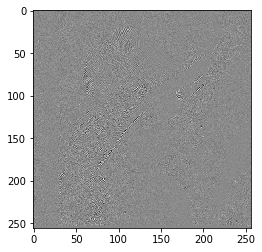

In [309]:
plt.imshow(H_dwt[0][2], cmap='gray')

In [280]:
type(H_dwt[1])

tuple

In [306]:
# Compute the pyramid
H_level = []
for l in range(0, N-1, 1):
    print(l)
    # Create a matrix of zeros to use it as the LL subband in each level of the LPT
    zero_LL = np.zeros((H_dwt[l][0].shape[0],H_dwt[l][0].shape[1]), 'float32')
    DWT_level = (zero_LL, H_dwt[l])
    LPT_level = pywt.idwt2(DWT_level, wavelet, mode='per')
    print(LPT_level.shape)
    #LPT_level = []
    #for col in colors:
        # Create the list structure for the LPT level
        #DWT_level = [zero_LL, full_coeffs]
        #LPT_level.append(pywt.idwt2(DWT_level, 'bior3.5'))
    H_level.append(LPT_level)

0
(512, 512)
1
(256, 256)
2
(128, 128)
3
(64, 64)


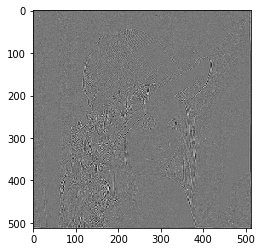

In [312]:
plt.imshow(H_level[0], cmap='gray')

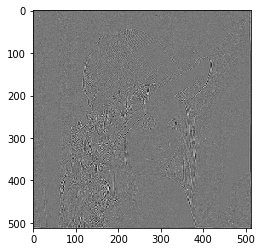

In [314]:
max = H_level[0].max()
min = H_level[0].min()
maxmin = max - min
tmp = (H_level[0] - min)/maxmin
plt.imshow(tmp, cmap='gray')

In [62]:
tmp = np.zeros((coeffs[0][0].shape[0],coeffs[0][0].shape[1],3), 'float32')
tmp[..., 0] = coeffs[0][0]
tmp[..., 1] = coeffs[1][0]
tmp[..., 2] = coeffs[2][0]
max = tmp.max()
min = tmp.min()
maxmin = max - min
tmp = (tmp - min) / maxmin
print(tmp)
plt.imshow(tmp)

IndexError: tuple index out of range

In [ ]:
# Histogram of the LL0 subband
_tmp = tmp[:][:][:]*256
#_tmp = _tmp.astype(int)
_tmp = np.uint8(_tmp)
#colors = ('r','g','b')
print("_tmp =", _tmp, "\ncoeffs[0][0] =", coeffs[0][0])
histr = [0 for col in colors]
for i,col in enumerate(colors):
    histr[i] = cv2.calcHist([_tmp],[i],None,[256],[0,256])
    plt.plot(histr[i], color = col)
plt.xlim([0,256])
plt.show()

In [ ]:
# Subband LL
entropy_LL = [0. for i,col in enumerate(colors)]
for i,col in enumerate(colors):
    entropy_LL[i] = st.entropy(histr[i])
    print(col, entropy_LL[i])

In [ ]:
expected_LL_bytes = 0
for i,col in enumerate(colors):
    expected_LL_bytes += entropy_LL[i]
expected_LL_bytes *= (coeffs[0][0].shape[0] * coeffs[0][0].shape[1])
expected_LL_bytes /= 8.0
print("Expected length of the LL subband (all components) =", expected_LL_bytes, "bytes")

Install with [Pillow](https://python-pillow.org) with "`pip3 install pillow`".

In [ ]:
from PIL import Image
im = Image.fromarray(_tmp)
im.save("L0.png")

In [ ]:
tmp = np.zeros((coeffs[0][0].shape[0],coeffs[0][0].shape[1],3), 'float32')
tmp[..., 0] = coeffs[0][1][0]
tmp[..., 1] = coeffs[1][1][0]
tmp[..., 2] = coeffs[2][1][0]
max = tmp.max()
min = tmp.min()
maxmin = max - min
tmp = (tmp - min) / maxmin
print (tmp.max(), tmp.min())
plt.imshow(tmp)

In [ ]:
tmp_ = tmp * 256
tmp_ = tmp_.astype('uint8')
print(tmp_.shape)
tmp_[:,:,0] = cv2.equalizeHist(tmp_[:,:,0])
tmp_[:,:,1] = cv2.equalizeHist(tmp_[:,:,1])
tmp_[:,:,2] = cv2.equalizeHist(tmp_[:,:,2])
plt.imshow(tmp_)

In [ ]:
tmp_ = tmp * 256
tmp_ = tmp_.astype('uint8')
print(tmp_.shape)
yuv = cv2.cvtColor(tmp_, cv2.COLOR_RGB2YUV)
yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0]) # equalize the histogram of the Y (=0) channel
rgb = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB) # convert the YUV image back to RGB format
plt.imshow(rgb)

In [ ]:
tmp_ = tmp * 256
tmp_ = tmp_.astype('uint8')
print(tmp_.shape)
yuv = cv2.cvtColor(tmp_, cv2.COLOR_RGB2YUV)
yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])   # equalize the histogram of the Y (=0) channel
yuv[:,:,1] = cv2.equalizeHist(yuv[:,:,1])   # equalize the histogram of the U (=1) channel
yuv[:,:,2] = cv2.equalizeHist(yuv[:,:,2])   # equalize the histogram of the V (=2) channel
rgb = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)  # convert the YUV image back to RGB format
plt.imshow(rgb)

In [ ]:
t = np.arange(1.0, 255.0, 0.01)
plt.plot(t, np.log(t)*256/6)

In [ ]:
tmp_ = np.log((tmp + 1.0)*256.0)*256/6
print((np.log(tmp+1.0)*256).min(), (np.log(tmp+1.0)*256).max())
plt.imshow(tmp_.astype('uint8'))
print(tmp_, tmp_.min(), tmp_.max())

In [ ]:
tmp_ = np.log(np.abs(tmp-0.5)+1.0)*255/0.4
print(tmp_.min(), tmp_.max())
plt.imshow(tmp_.astype('uint8'))

In [ ]:
# Histogram of the LH0 subband
_tmp = tmp[:][:][:]*256
_tmp = np.uint8(_tmp)
# print("_tmp =", _tmp, "\ncoeffs[0][0] =", coeffs[0][0])
histr = [0 for col in colors]
for i,col in enumerate(colors):
    histr[i] = cv2.calcHist([_tmp],[i],None,[256],[0,256])
    plt.plot(histr[i], color = col)
plt.xlim([0,256])
plt.show()

In [ ]:
entropy_LH = [0. for i,col in enumerate(colors)]
for i,col in enumerate(colors):
    entropy_LH[i] = st.entropy(histr[i])
    print(col, entropy_LH[i])

In [ ]:
expected_LH_bytes = 0
for i,col in enumerate(colors):
    expected_LH_bytes += entropy_LH[i]
expected_LH_bytes *= (coeffs[0][0].shape[0] * coeffs[0][0].shape[1])
expected_LH_bytes /= 8.0
print("Expected length of the LH subband (all components) =", expected_LH_bytes, "bytes")

In [ ]:
im = Image.fromarray(_tmp)
im.save("LH0.png")

In [ ]:
tmp = np.zeros((coeffs[0][0].shape[0],coeffs[0][0].shape[1],3), 'float32')
tmp[..., 0] = coeffs[0][1][1]
tmp[..., 1] = coeffs[1][1][1]
tmp[..., 2] = coeffs[2][1][1]
max = tmp.max()
min = tmp.min()
maxmin = max - min
tmp = (tmp - min) / maxmin
plt.imshow((tmp - 128) * 10 + 128)

In [ ]:
# Histogram of the HL0 subband
_tmp = tmp[:][:][:]*256
_tmp = np.uint8(_tmp)
# print("_tmp =", _tmp, "\ncoeffs[0][0] =", coeffs[0][0])
histr = [0 for col in colors]
for i,col in enumerate(colors):
    histr[i] = cv2.calcHist([_tmp],[i],None,[256],[0,256])
    plt.plot(histr[i], color = col)
plt.xlim([0,256])
plt.show()

In [ ]:
entropy_HL = [0. for i,col in enumerate(colors)]
for i,col in enumerate(colors):
    entropy_HL[i] = st.entropy(histr[i])
    print(col, entropy_HL[i])

In [ ]:
expected_HL_bytes = 0
for i,col in enumerate(colors):
    expected_HL_bytes += entropy_HL[i]
expected_HL_bytes *= (coeffs[0][0].shape[0] * coeffs[0][0].shape[1])
expected_HL_bytes /= 8.0
print("Expected length of the HL subband (all components) =", expected_HL_bytes, "bytes")

In [ ]:
im = Image.fromarray(_tmp)
im.save("HL0.png")

In [ ]:
tmp = np.zeros((coeffs[0][0].shape[0],coeffs[0][0].shape[1],3), 'float32')
tmp[..., 0] = coeffs[0][1][2]
tmp[..., 1] = coeffs[1][1][2]
tmp[..., 2] = coeffs[2][1][2]
max = tmp.max()
min = tmp.min()
maxmin = max - min
tmp = (tmp - min) / maxmin
plt.imshow((tmp - 128) * 2 + 128)

In [ ]:
# Histogram of the HH0 subband
_tmp = tmp[:][:][:]*256
_tmp = np.uint8(_tmp)
# print("_tmp =", _tmp, "\ncoeffs[0][0] =", coeffs[0][0])
histr = [0 for col in colors]
for i,col in enumerate(colors):
    histr[i] = cv2.calcHist([_tmp],[i],None,[256],[0,256])
    plt.plot(histr[i], color = col)
plt.xlim([0,256])
plt.show()

In [ ]:
entropy_HH = [0. for i,col in enumerate(colors)]
for i,col in enumerate(colors):
    entropy_HH[i] = st.entropy(histr[i])
    print(col, entropy_HH[i])

In [ ]:
expected_HH_bytes = 0
for i,col in enumerate(colors):
    expected_HH_bytes += entropy_HH[i]
expected_HH_bytes *= (coeffs[0][0].shape[0] * coeffs[0][0].shape[1])
expected_HH_bytes /= 8.0
print("Expected length of the HH subband (all components) =", expected_HH_bytes, "bytes")

In [ ]:
im = Image.fromarray(_tmp)
im.save("HH0.png")

In [ ]:
expected_HFS_bytes = expected_HL_bytes + expected_HL_bytes + expected_HH_bytes
print("Expected length of the high-frequency subbands (all components) =", expected_HFS_bytes, "bytes")

To transform the 1-level DWT space into the 1-level LPT space, we need compute LPT H0 level according to the content of the HL0, LH0 and HH0 DWT subbands and discarding LL0.

In [ ]:
coeffs[0][0][:] = 0.0
coeffs[1][0][:] = 0.0
coeffs[2][0][:] = 0.0

In [ ]:
# Compute the inverse DWT of each component
component = [None]*3
for i,col in enumerate(colors):
    component[i] = pywt.idwt2(coeffs[i], 'bior3.5')
    #coeffs[i] = I[:,:,i]

In [ ]:
tmp = np.zeros((I.shape[0],I.shape[1],3), 'uint8')
tmp[..., 0] = component[0] + 128
tmp[..., 1] = component[1] + 128
tmp[..., 2] = component[2] + 128

In [ ]:
plt.imshow((tmp - 128) * 10 + 128)

In [ ]:
# Histogram of the pyramid level 0 (H0)

#_tmp = tmp[:][:][:]*256
# print("_tmp =", _tmp, "\ncoeffs[0][0] =", coeffs[0][0])
histr = [0 for col in colors]
for i,col in enumerate(colors):
    histr[i] = cv2.calcHist([tmp],[i],None,[256],[0,256])
    plt.plot(histr[i], color = col)
plt.xlim([0,256])
plt.show()

#colors = ('r','g','b')
##sum_histr = [0 for i,col in enumerate(colors)]
##for i,col in enumerate(colors):
##    sum_histr[i] = np.zeros([256,1], np.float64)
#for i,col in enumerate(colors):
#    histr = cv2.calcHist([tmp],[i],None,[256],[0,256])
##    for n in range(N):
##        histr = cv2.calcHist([H[n]],[i],None,[256],[0,256]) # cv2.calcHist returns a float64 array
##        sum_histr[i] += histr
#    plt.plot(histr, color = col)
#plt.xlim([0,256])
#plt.show()

In [ ]:
entropy_H0 = [0. for i,col in enumerate(colors)]
for i,col in enumerate(colors):
    entropy_H0[i] = st.entropy(histr[i])[0]
    print(col, entropy_H0[i])

In [ ]:
expected_H0_bytes = 0
print (type(expected_H0_bytes))
for i,col in enumerate(colors):
    expected_H0_bytes += entropy_H0[i]
print (expected_H0_bytes)
expected_H0_bytes *= (I.shape[0] * I.shape[1])
expected_H0_bytes /= 8.0
print("Expected length of the H0 subband (all components) =", expected_H0_bytes, "bytes")

In [ ]:
from PIL import Image
im = Image.fromarray(tmp)
im.save("H0.png")

Let's perform an [histogram equalization](http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html) to improve the contrast of the H0 image.

In [ ]:
yuv = cv2.cvtColor(tmp, cv2.COLOR_RGB2YUV)

# equalize the histogram of the Y channel
yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])

# convert the YUV image back to RGB format
rgb = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)

In [ ]:
plt.imshow(rgb)

In [ ]:
tmp_amplified = (tmp - 128) * 10 + 128
print ("amp =", tmp_amplified, "tmp =", tmp)

In [ ]:
plt.imshow((tmp - 128) * 10 + 128)